In [2]:
import numpy as np
import pandas as pd
import tsfel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from dataclasses import dataclass
import pickle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## **Task 2 : Decision Trees for Human Activity Recognition**

### **1.** Use Sklearn Library to train Decision Trees. [1.5 marks]

- **1.1** Train a decision tree model using the raw accelerometer data.  
  Report the accuracy, precision, recall, and confusion matrix of the model.  

- **1.2** Train a decision tree model using the features obtained by TSFEL.  
  Report the accuracy, precision, recall, and confusion matrix of the model.  

- **1.3** Train a decision tree model using the features provided in the dataset.  
  Report the accuracy, precision, recall, and confusion matrix of the model.  

- **1.4** Compare the results of the three models.  
  Which model do you think is better?


### **1.1** Training a decision tree model using the raw accelerometer data.

In [3]:
X_train = np.load(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\RawAccelerometer Data\X_train.npy")
X_test = np.load(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\RawAccelerometer Data\X_test.npy")
y_train = np.load(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\RawAccelerometer Data\y_train.npy")
y_test = np.load(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\RawAccelerometer Data\y_test.npy")

In [4]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

feature_names = [f"Feature {i}" for i in range(X_train_reshaped.shape[1])]
activity = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
class_names = [act for act in activity]

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_reshaped, y_train)

with open('../Task-3 Data Collection in the Wild/Saved_DecisionTrees/dt1_model.sav', 'wb') as f:
    pickle.dump(dt, f)

y_pred = dt.predict(X_test_reshaped)

In [5]:
# Metrics
print("Classification Report:\n",classification_report(y_test, y_pred, labels= np.unique(y_train), target_names=activity))
print(f"Overall Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Overall Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Overall Recall:    {recall_score(y_test, y_pred, average='macro'):.4f}")

Classification Report:
                     precision    recall  f1-score   support

           WALKING       0.25      0.22      0.24         9
  WALKING_UPSTAIRS       0.50      0.56      0.53         9
WALKING_DOWNSTAIRS       0.25      0.11      0.15         9
           SITTING       0.67      0.89      0.76         9
          STANDING       0.80      0.89      0.84         9
            LAYING       0.90      1.00      0.95         9

          accuracy                           0.61        54
         macro avg       0.56      0.61      0.58        54
      weighted avg       0.56      0.61      0.58        54

Overall Accuracy:  0.6111
Overall Precision: 0.5611
Overall Recall:    0.6111


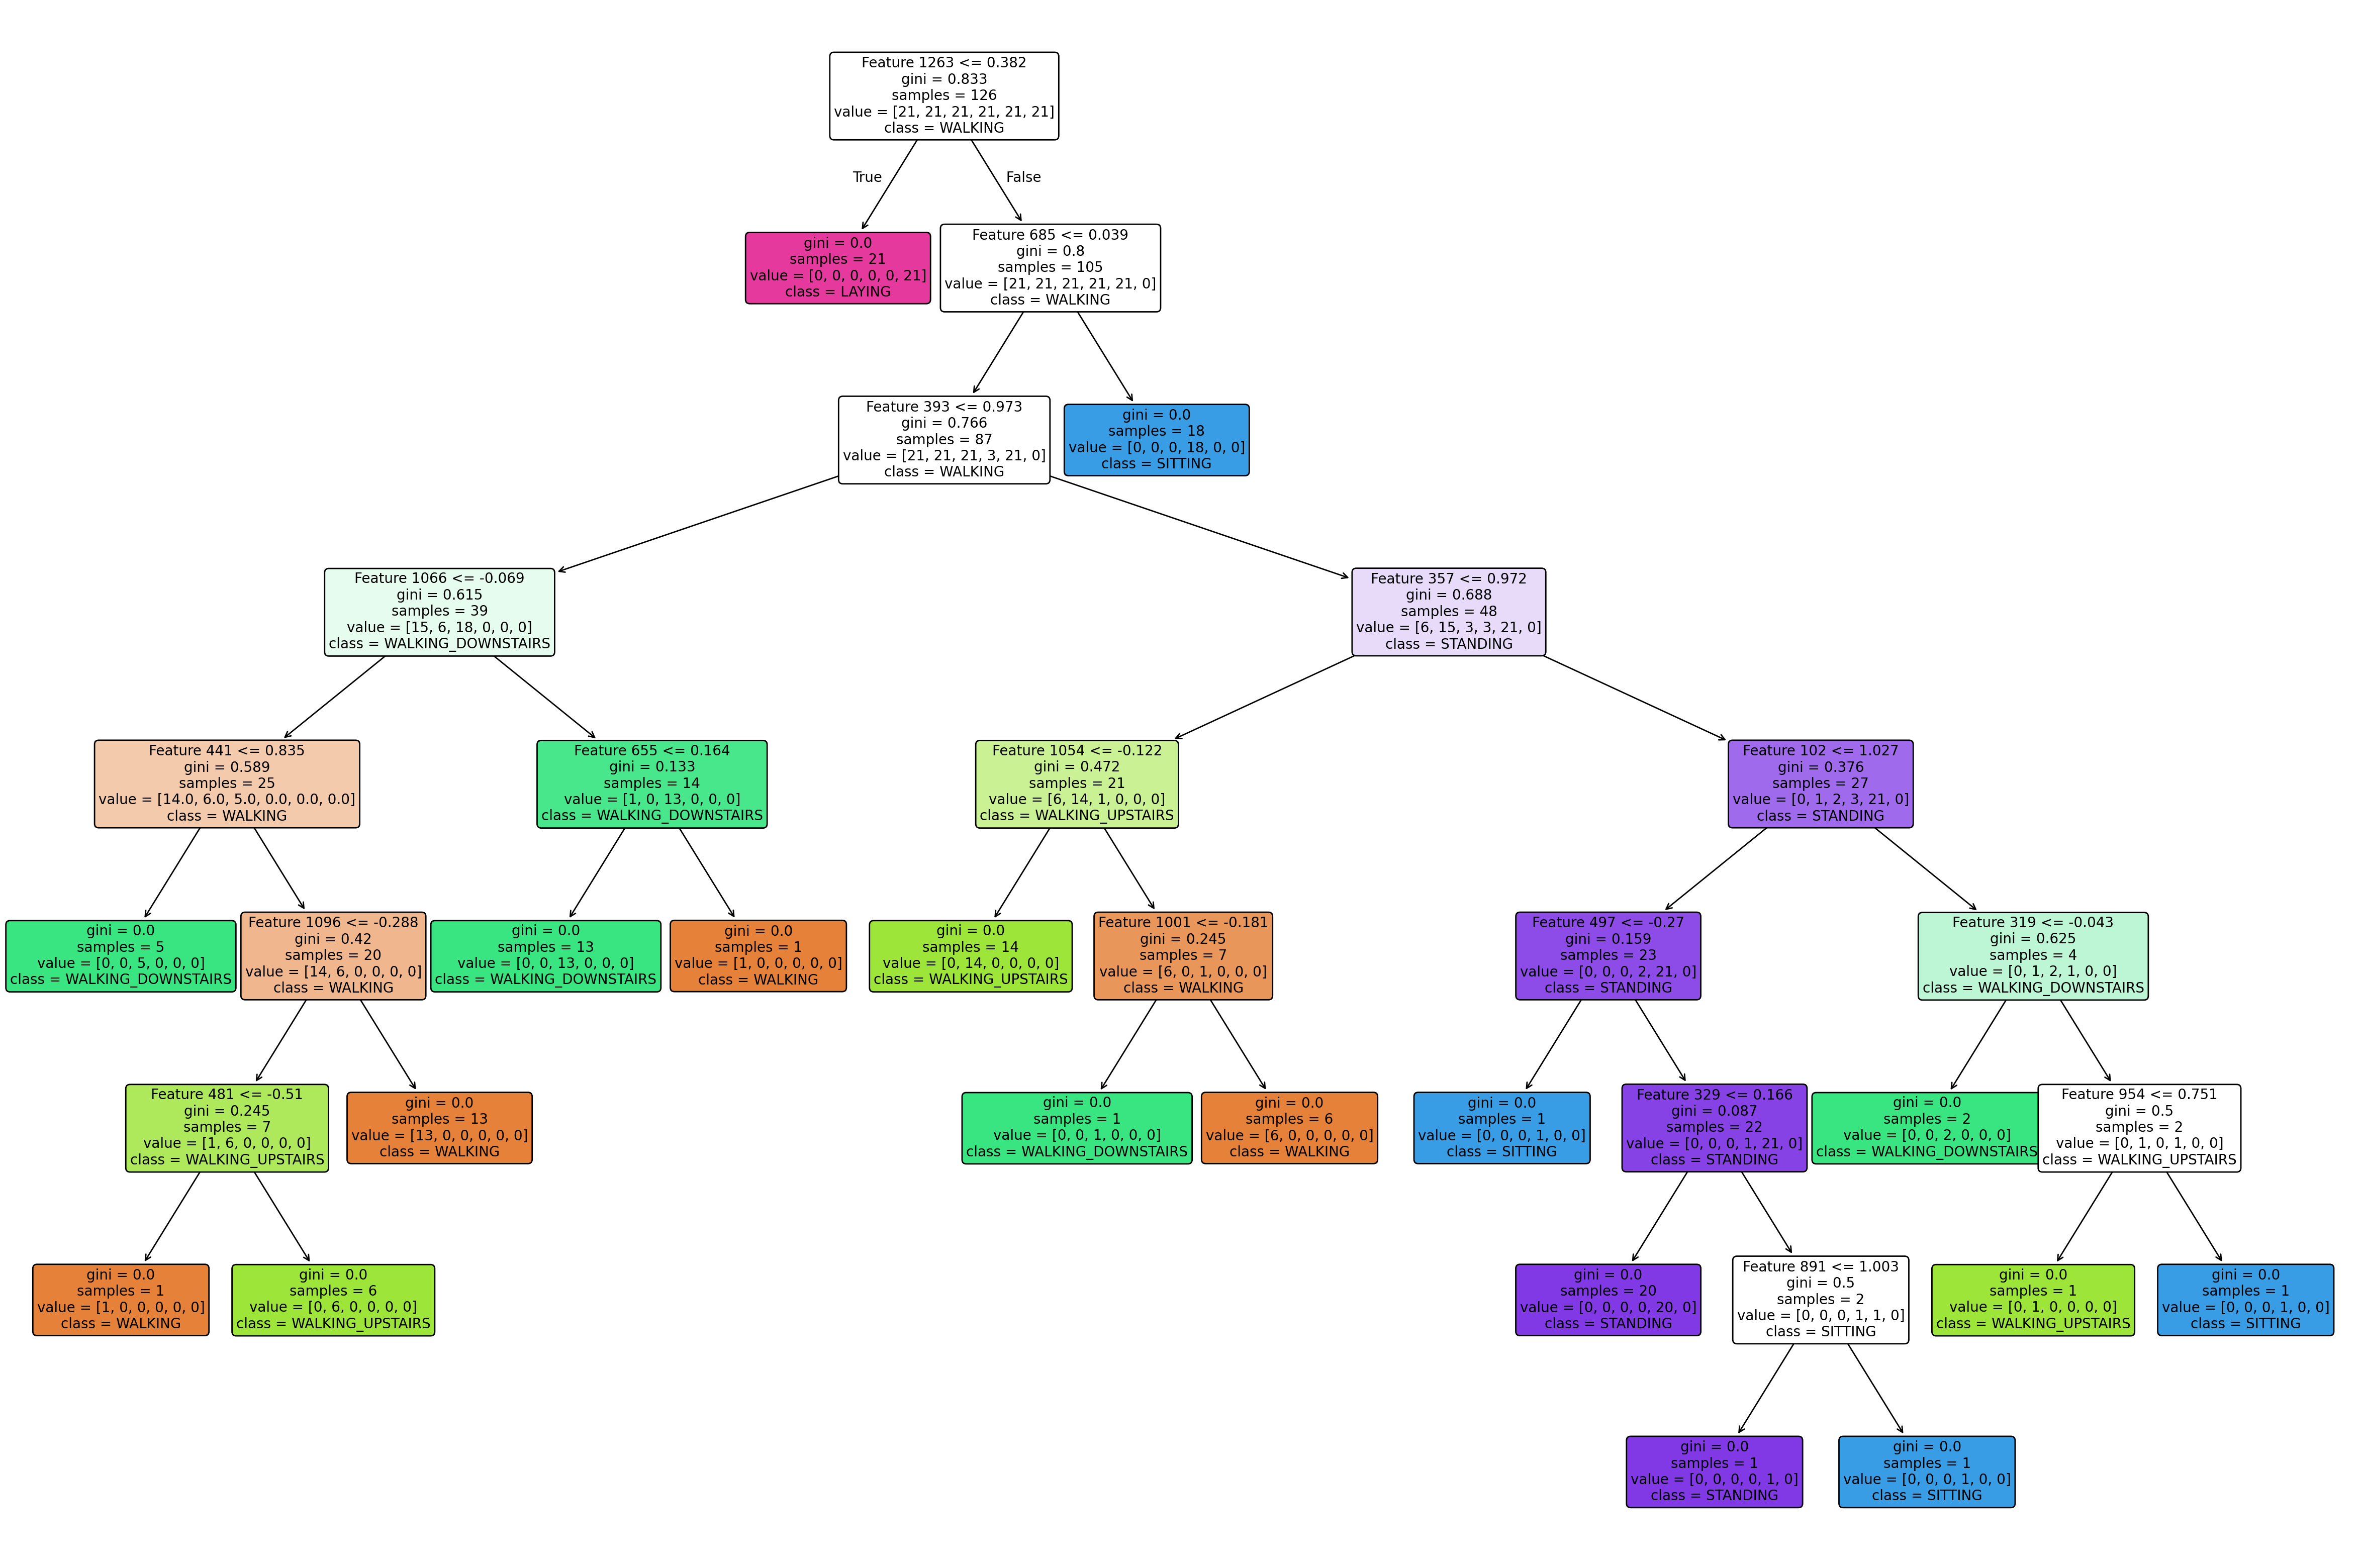

In [6]:
plt.figure(figsize=(30, 20))
plot_tree(
    dt, 
    feature_names=feature_names, 
    class_names=activity, 
    filled=True,
    rounded=True, 
    fontsize=10
)
plt.show()

<Figure size 800x600 with 0 Axes>

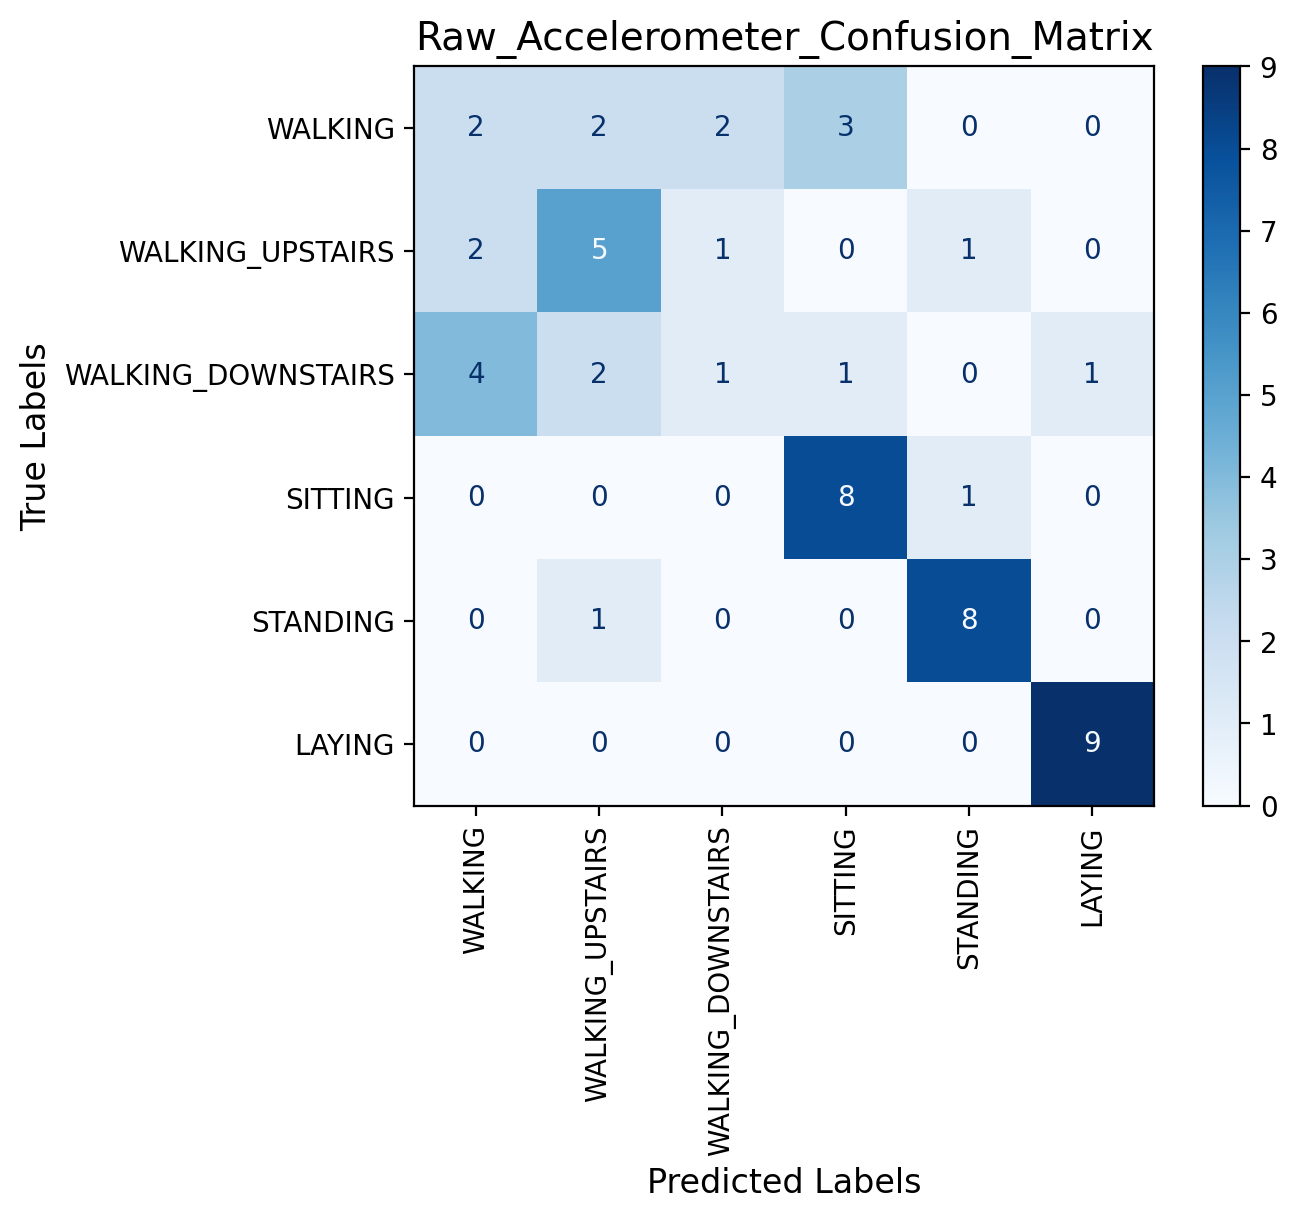

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

c_mat = ConfusionMatrixDisplay(conf_matrix, display_labels=activity)
c_mat.plot(cmap="Blues", xticks_rotation=90)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Raw_Accelerometer_Confusion_Matrix', fontsize=14)
plt.savefig(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Task-2 Decision Trees for HAR\Saved_Images\Raw_Accelerometer_Confusion_Matrix.png", dpi=500, bbox_inches="tight")
plt.show()

### **1.2** Training a decision tree model using the features obtained by TSFEL

In [8]:
X_train_t = pd.read_csv(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\TSFEL Data\X_train.csv")
X_test_t = pd.read_csv(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\TSFEL Data\X_test.csv")

In [9]:
X_train_reshaped_t = X_train_t.iloc[:, :].values
X_test_reshaped_t = X_test_t.iloc[:, :].values

feature_names = [f"Feature {i}" for i in range(X_train_reshaped_t.shape[1])]
activity = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
class_names = [act for act in activity]

dt_t = DecisionTreeClassifier(random_state=42)
dt_t.fit(X_train_reshaped_t, y_train)

with open('../Task-3 Data Collection in the Wild/Saved_DecisionTrees/dt2_model.sav', 'wb') as f:
    pickle.dump(dt_t, f)


y_pred_t = dt_t.predict(X_test_reshaped_t)

In [10]:
# Metrics
print("Classification Report:\n",classification_report(y_test, y_pred_t, labels= np.unique(y_train), target_names=activity))
print(f"Overall Accuracy:  {accuracy_score(y_test, y_pred_t):.4f}")
print(f"Overall Precision: {precision_score(y_test, y_pred_t, average='macro'):.4f}")
print(f"Overall Recall:    {recall_score(y_test, y_pred_t, average='macro'):.4f}")

Classification Report:
                     precision    recall  f1-score   support

           WALKING       0.88      0.78      0.82         9
  WALKING_UPSTAIRS       0.73      0.89      0.80         9
WALKING_DOWNSTAIRS       0.88      0.78      0.82         9
           SITTING       1.00      0.89      0.94         9
          STANDING       0.90      1.00      0.95         9
            LAYING       1.00      1.00      1.00         9

          accuracy                           0.89        54
         macro avg       0.90      0.89      0.89        54
      weighted avg       0.90      0.89      0.89        54

Overall Accuracy:  0.8889
Overall Precision: 0.8962
Overall Recall:    0.8889


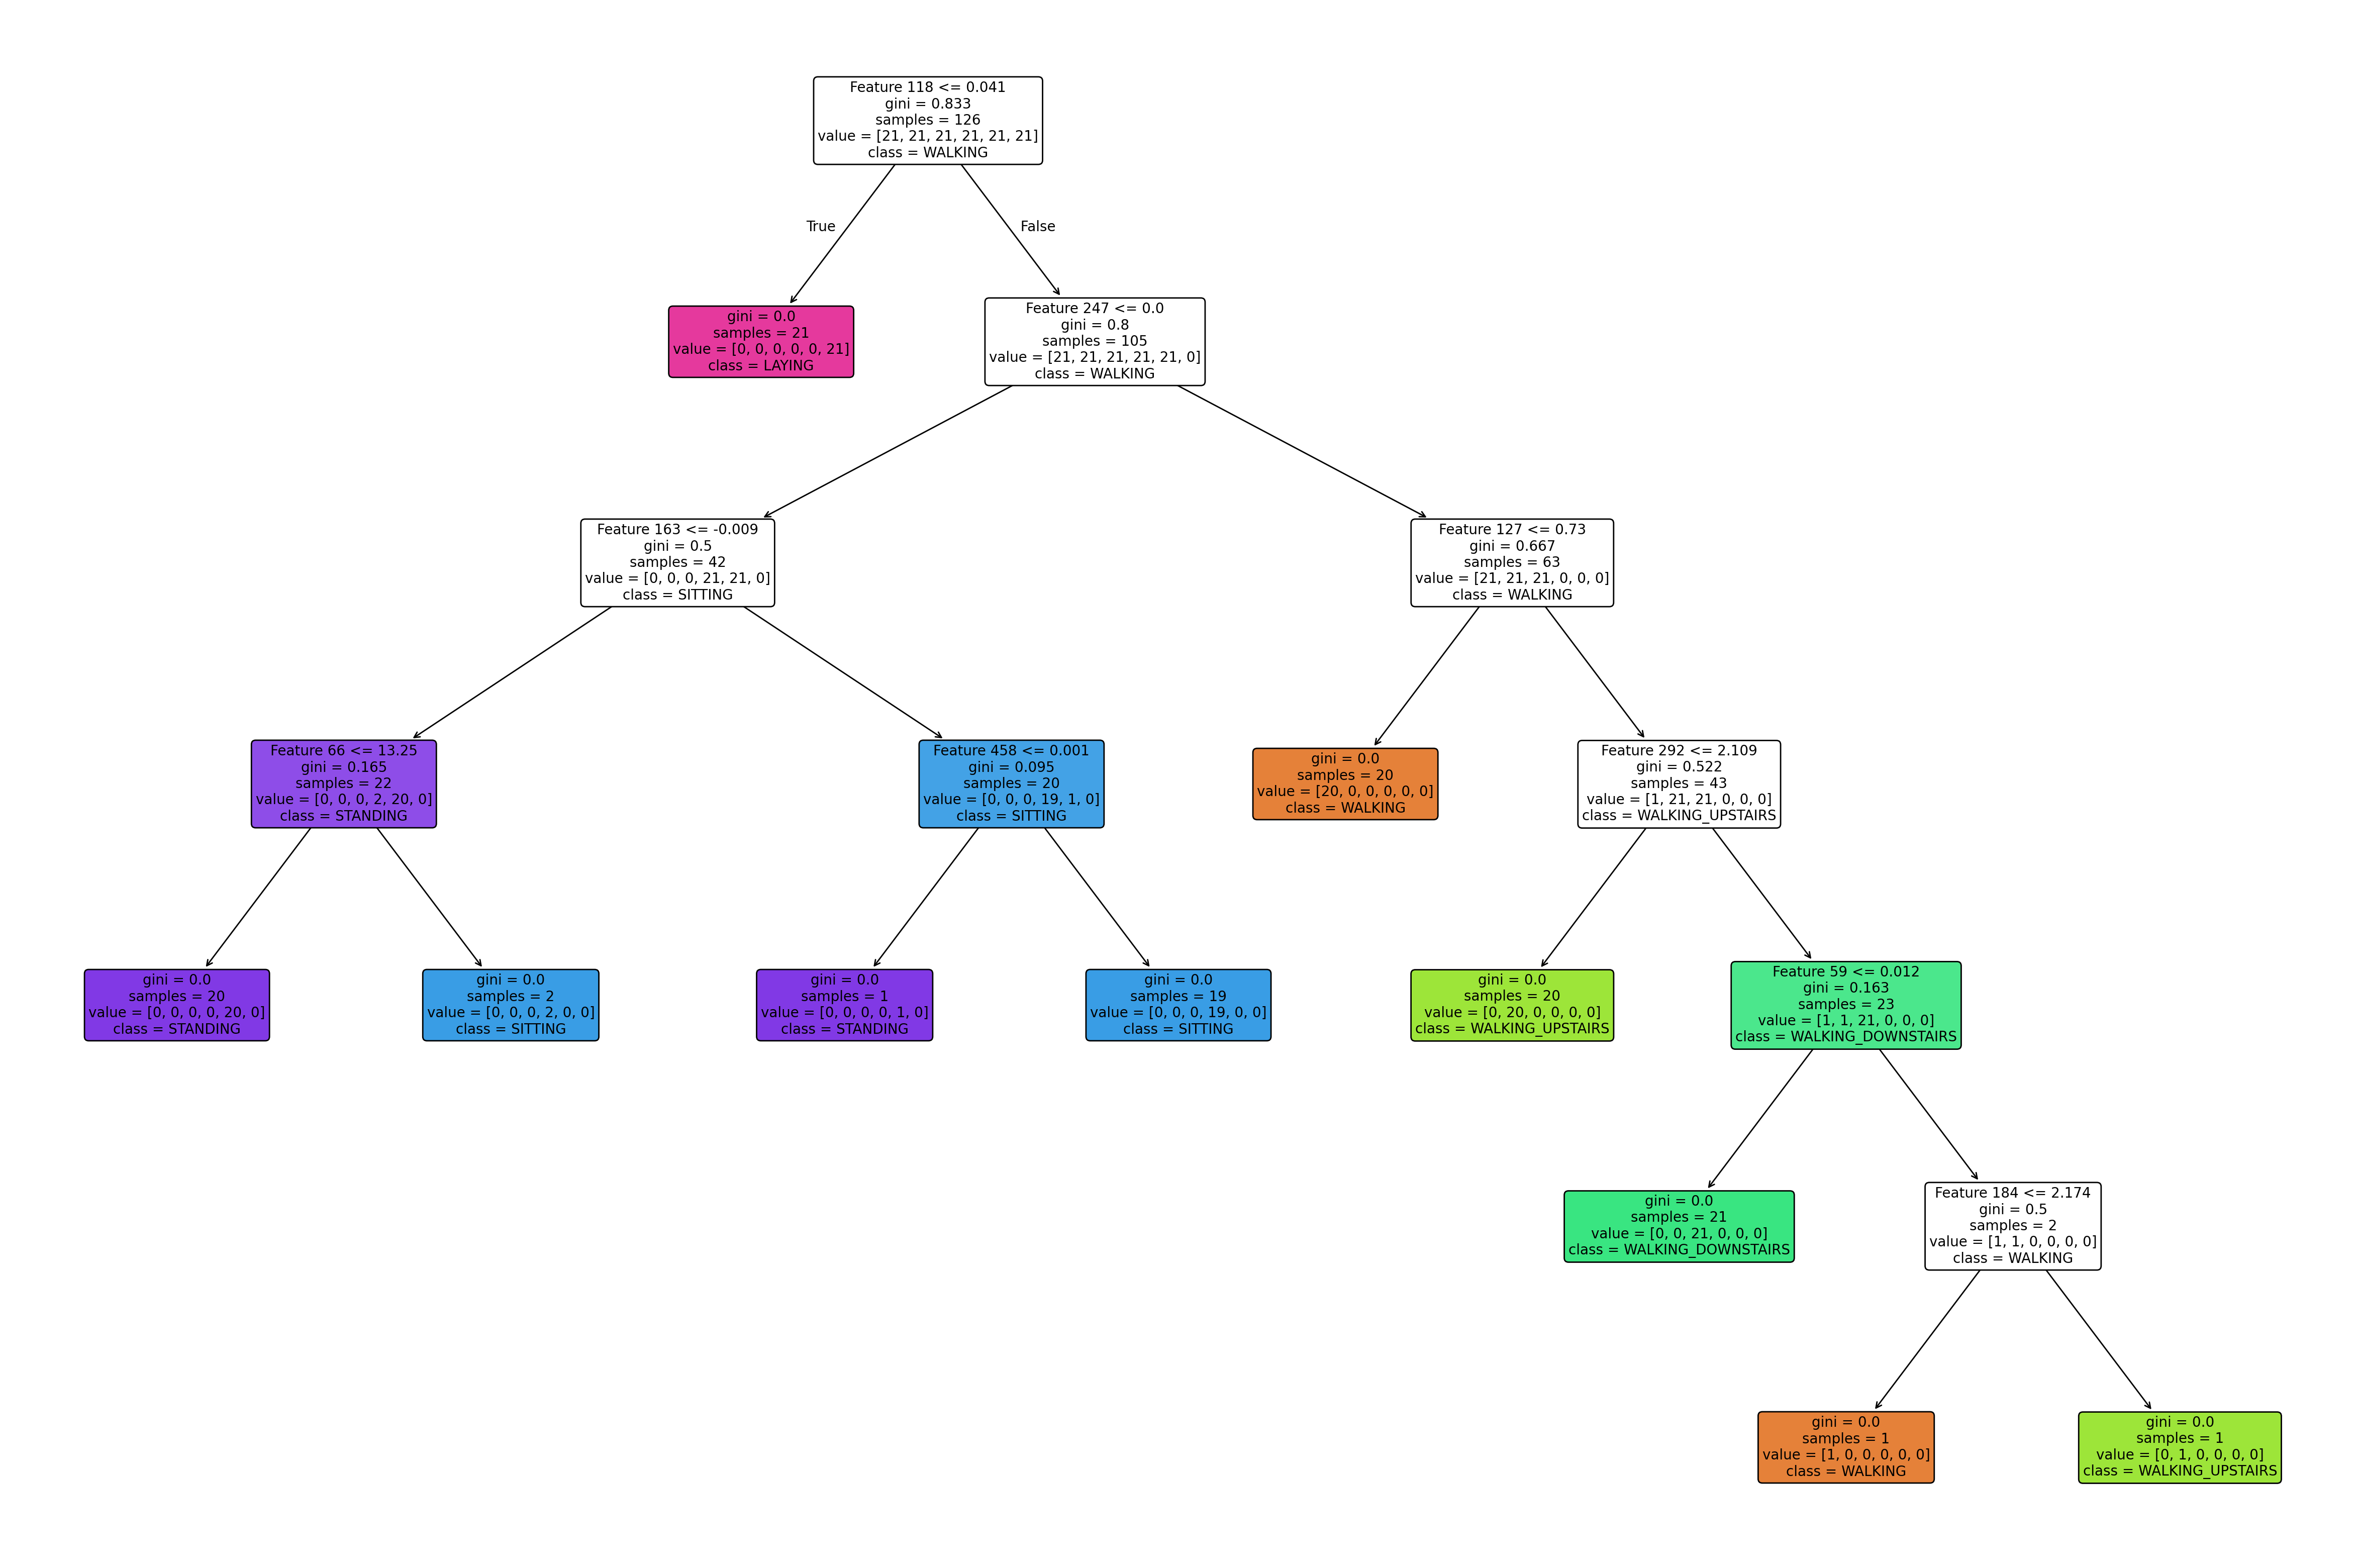

In [11]:
plt.figure(figsize=(30, 20))
plot_tree(
    dt_t, 
    feature_names=feature_names, 
    class_names=activity, 
    filled=True,
    rounded=True, 
    fontsize=10
)
plt.show()

<Figure size 800x600 with 0 Axes>

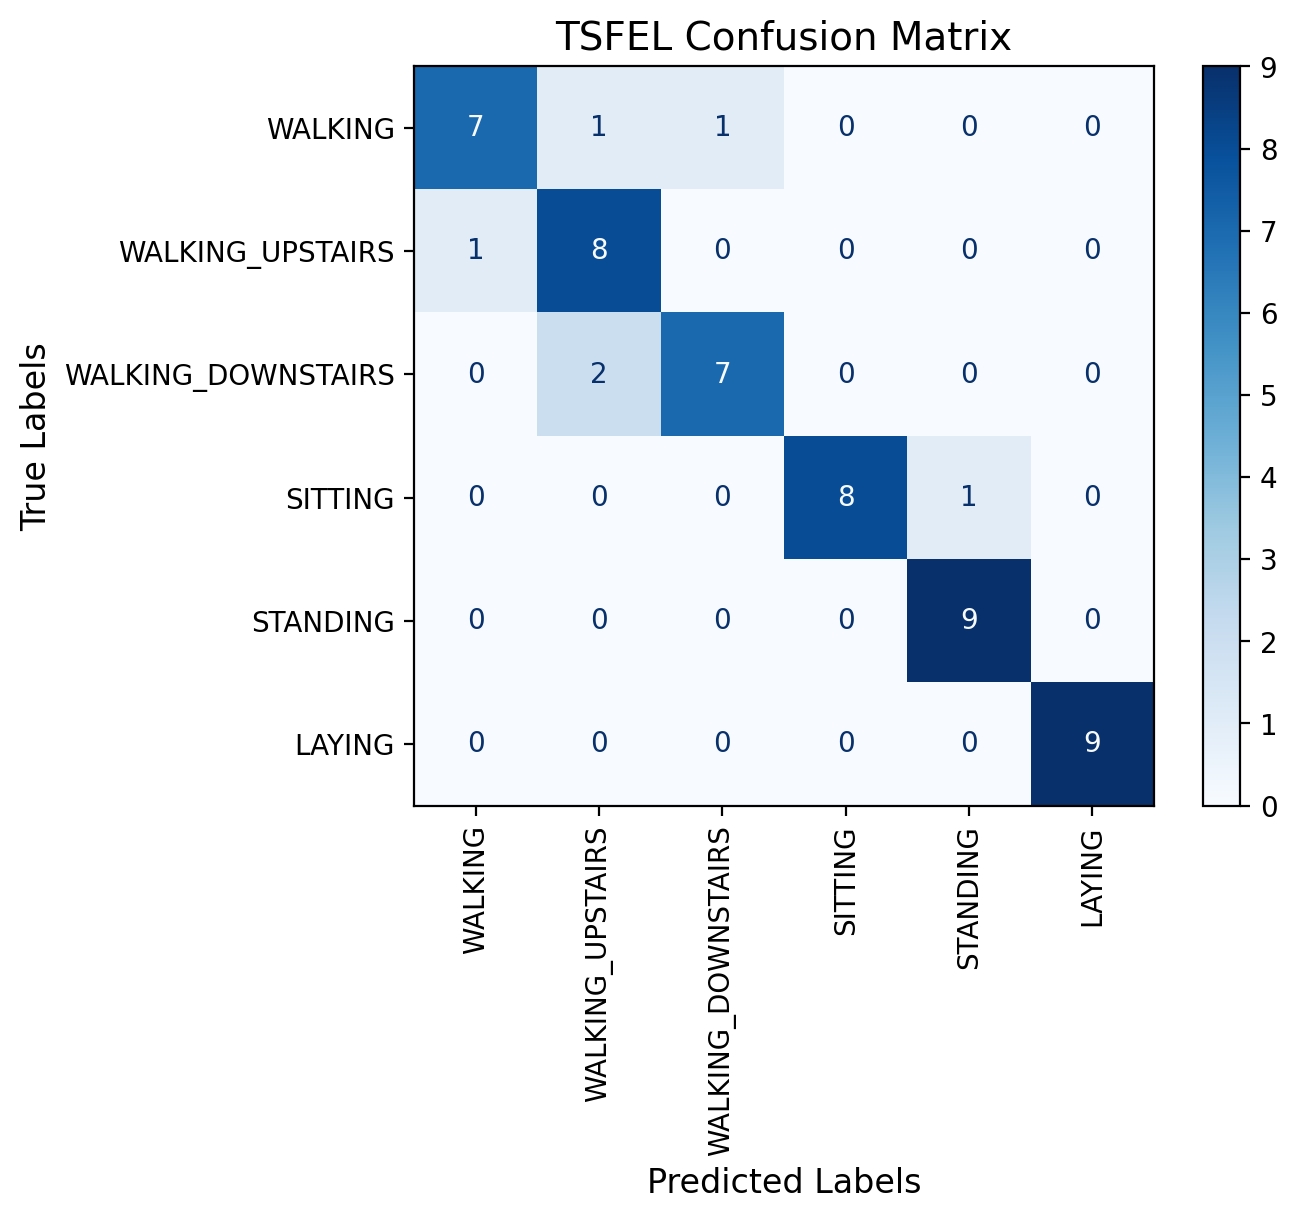

In [12]:
conf_matrix_t = confusion_matrix(y_test, y_pred_t)
plt.figure(figsize=(8, 6))

c_mat_t = ConfusionMatrixDisplay(conf_matrix_t, display_labels=activity)
c_mat_t.plot(cmap="Blues", xticks_rotation=90)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('TSFEL Confusion Matrix', fontsize=14)
plt.savefig(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Task-2 Decision Trees for HAR\Saved_Images\TSFEL_Confusion_Matrix.png", dpi=500, bbox_inches="tight")
plt.show()

### **1.3** Training a decision tree model using the features provided in UCI HAR dataset

In [13]:
X_train_r = pd.read_csv(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\UCI HAR Dataset\train\X_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header=None)
X_test_r = pd.read_csv(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\UCI HAR Dataset\test\X_test.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header=None)
y_test_r = pd.read_csv(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\UCI HAR Dataset\test\y_test.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header=None)
y_train_r = pd.read_csv(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\UCI HAR Dataset\train\y_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header=None)

In [14]:
feature_names_r = [f"Feature {i}" for i in range(X_train_r.shape[1])]
activity = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
class_names = [act for act in activity]

dt_r = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_r.fit(X_train_r, y_train_r)

with open('../Task-3 Data Collection in the Wild/Saved_DecisionTrees/dt3_model.sav', 'wb') as f:
    pickle.dump(dt_r, f)

y_pred_r = dt_r.predict(X_test_r)

In [15]:
# Metrics
print("Classification Report:\n",classification_report(y_test_r, y_pred_r, labels= np.unique(y_train_r), target_names=activity))
print(f"Overall Accuracy:  {accuracy_score(y_test_r, y_pred_r):.4f}")
print(f"Overall Precision: {precision_score(y_test_r, y_pred_r, average='macro'):.4f}")
print(f"Overall Recall:    {recall_score(y_test_r,  y_pred_r, average='macro'):.4f}")

Classification Report:
                     precision    recall  f1-score   support

           WALKING       0.65      0.88      0.75       496
  WALKING_UPSTAIRS       0.77      0.71      0.74       471
WALKING_DOWNSTAIRS       0.94      0.62      0.75       420
           SITTING       0.78      0.81      0.79       491
          STANDING       0.82      0.79      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.81      2947
         macro avg       0.83      0.80      0.80      2947
      weighted avg       0.83      0.81      0.81      2947

Overall Accuracy:  0.8096
Overall Precision: 0.8254
Overall Recall:    0.8017


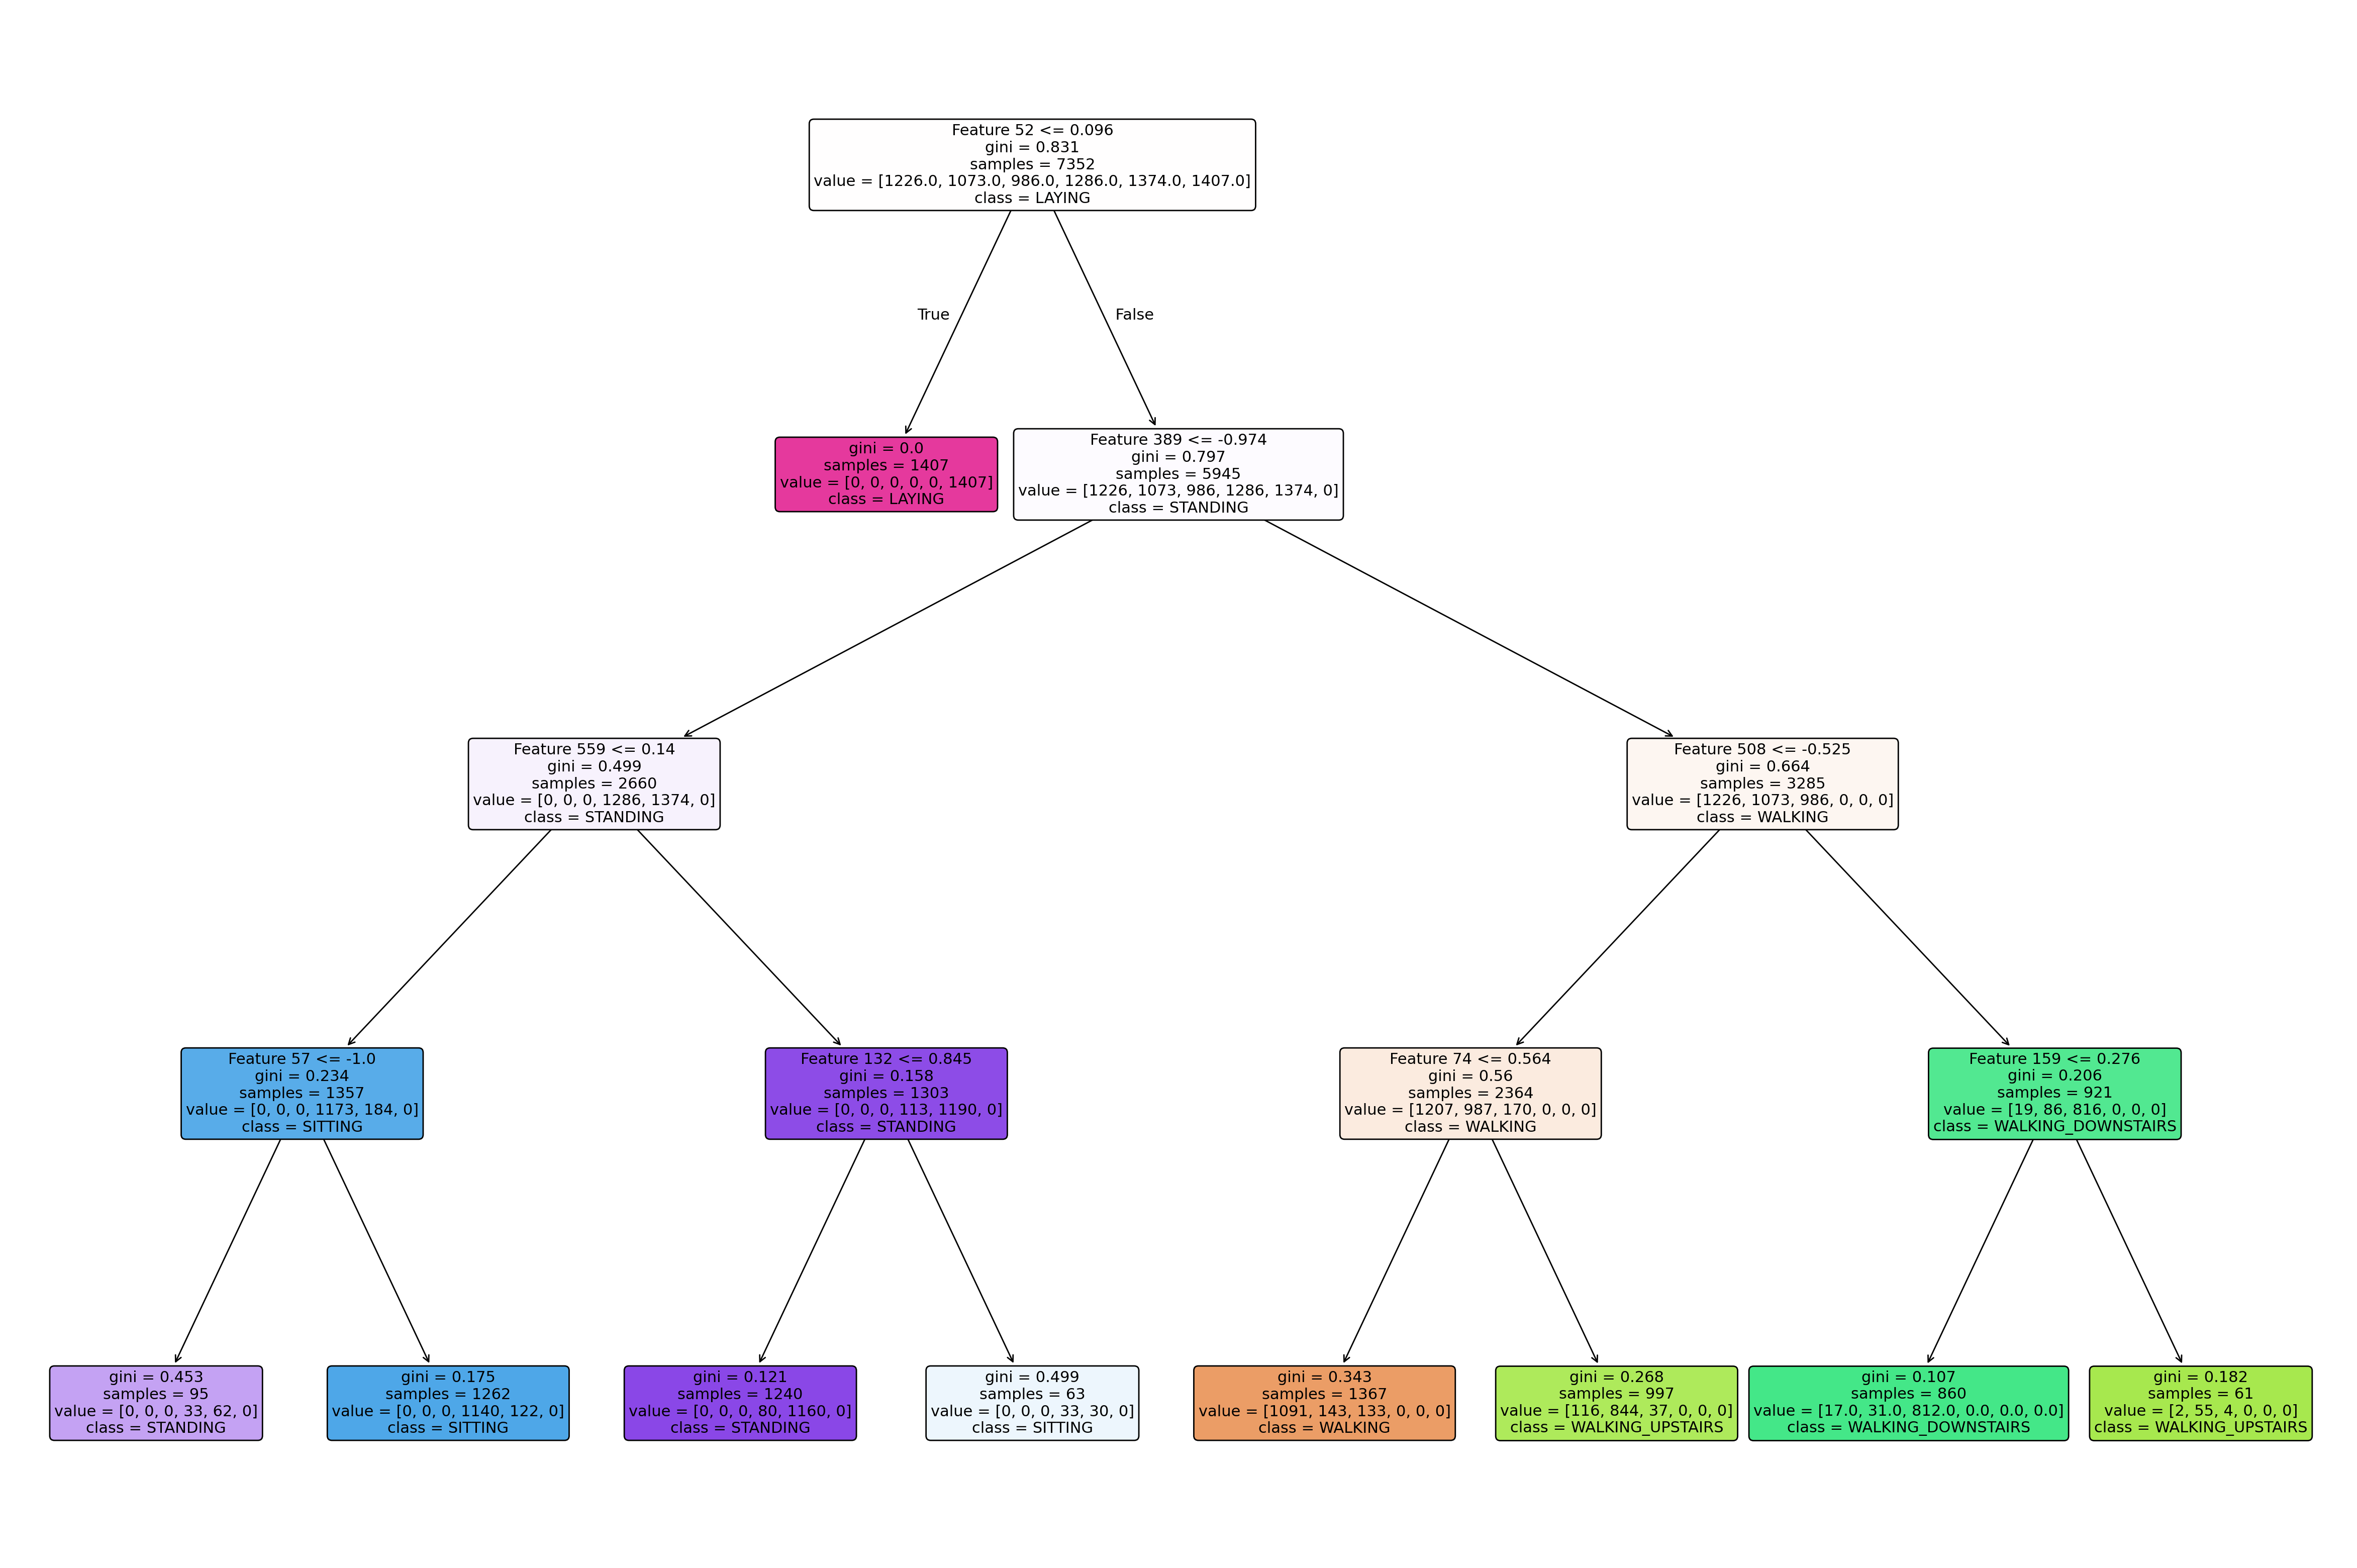

In [16]:
plt.figure(figsize=(30, 20))
plot_tree(
    dt_r, 
    feature_names=feature_names_r, 
    class_names=activity, 
    filled=True,
    rounded=True, 
    fontsize=11
)
plt.show()

<Figure size 800x600 with 0 Axes>

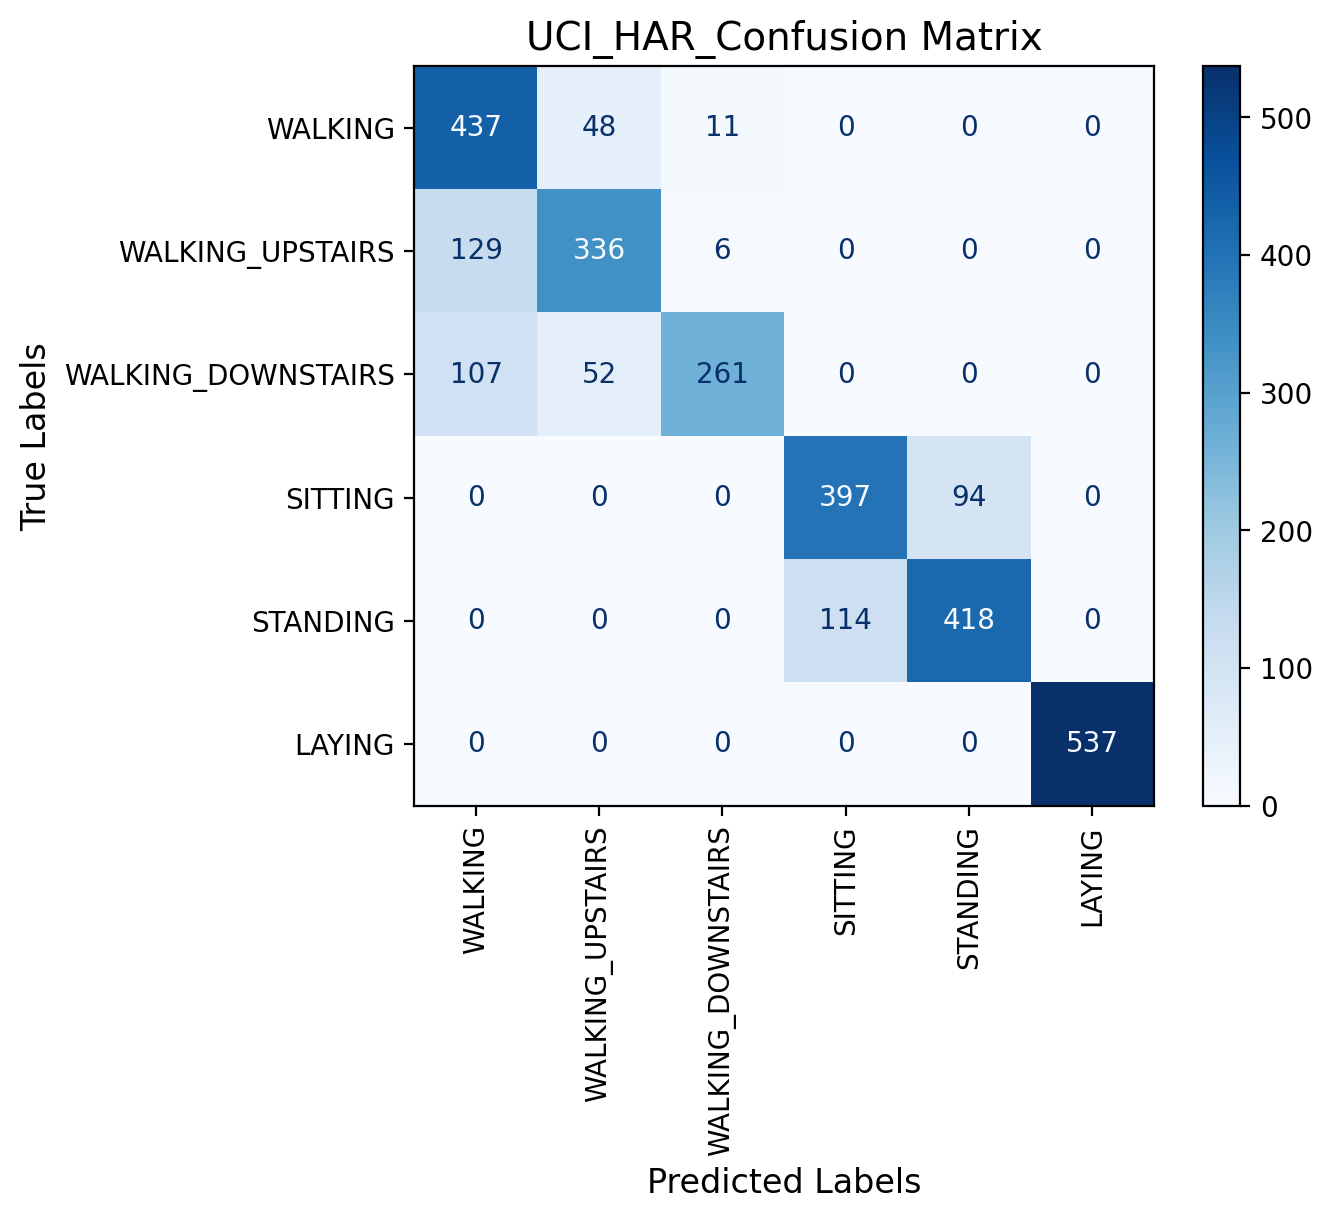

In [17]:
conf_matrix_r = confusion_matrix(y_test_r, y_pred_r)
plt.figure(figsize=(8, 6))

c_mat_r = ConfusionMatrixDisplay(conf_matrix_r, display_labels=activity)
c_mat_r.plot(cmap="Blues", xticks_rotation=90)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('UCI_HAR_Confusion Matrix', fontsize=14)
plt.savefig(r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Task-2 Decision Trees for HAR\Saved_Images\UCI_HAR_Confusion Matrix.png", dpi=500, bbox_inches="tight")
plt.show()

**1.4** Comparing the results of the three models.

On comparing the results of the 3 models shown above, the model that uses tsfel features performs the best having accuracy of around 88.89%, then comes the model which uses the features provided in UCI-HAR dataset with an accuracy of 86.22%(if max_depth isn't specified) in my case it is 80.96%(as max_depth specified is 4) and model that uses raw accelerometer data performs the worst with an accuracy of 61.11%.

This clearly shows that pre-precoessing of the data helps significantly in improving the performance of the model.

### **2.** Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. [1 marks]

In [18]:
def Dt_varying_depths(X_train, X_test, y_train, y_test):
    accuracies = []
    for i in range(2, 9):
        Dt = DecisionTreeClassifier(max_depth=i, random_state=42)
        Dt.fit(X_train, y_train)
        y_pred = Dt.predict(X_test)
        acc = np.round(accuracy_score(y_pred, y_test), 4)
        accuracies.append(acc)
        print(f"Accuracy for depth {i} is: {acc}")
    return accuracies

print("\nRaw Accelerometer Data")
accuracies_raw = Dt_varying_depths(X_train_reshaped, X_test_reshaped, y_train, y_test)

print("\nTSFEL Features")
accuracies_tsfel = Dt_varying_depths(X_train_t, X_test_t, y_train, y_test)

print("\nUCI HAR Dataset")
accuracies_UCI = Dt_varying_depths(X_train_r, X_test_r, y_train_r, y_test_r)


Raw Accelerometer Data
Accuracy for depth 2 is: 0.4259
Accuracy for depth 3 is: 0.537
Accuracy for depth 4 is: 0.5926
Accuracy for depth 5 is: 0.5926
Accuracy for depth 6 is: 0.6481
Accuracy for depth 7 is: 0.5741
Accuracy for depth 8 is: 0.6111

TSFEL Features
Accuracy for depth 2 is: 0.5
Accuracy for depth 3 is: 0.7407
Accuracy for depth 4 is: 0.8704
Accuracy for depth 5 is: 0.8889
Accuracy for depth 6 is: 0.8889
Accuracy for depth 7 is: 0.8889
Accuracy for depth 8 is: 0.8889

UCI HAR Dataset
Accuracy for depth 2 is: 0.531
Accuracy for depth 3 is: 0.7224
Accuracy for depth 4 is: 0.8096
Accuracy for depth 5 is: 0.8381
Accuracy for depth 6 is: 0.8544
Accuracy for depth 7 is: 0.8619
Accuracy for depth 8 is: 0.8683


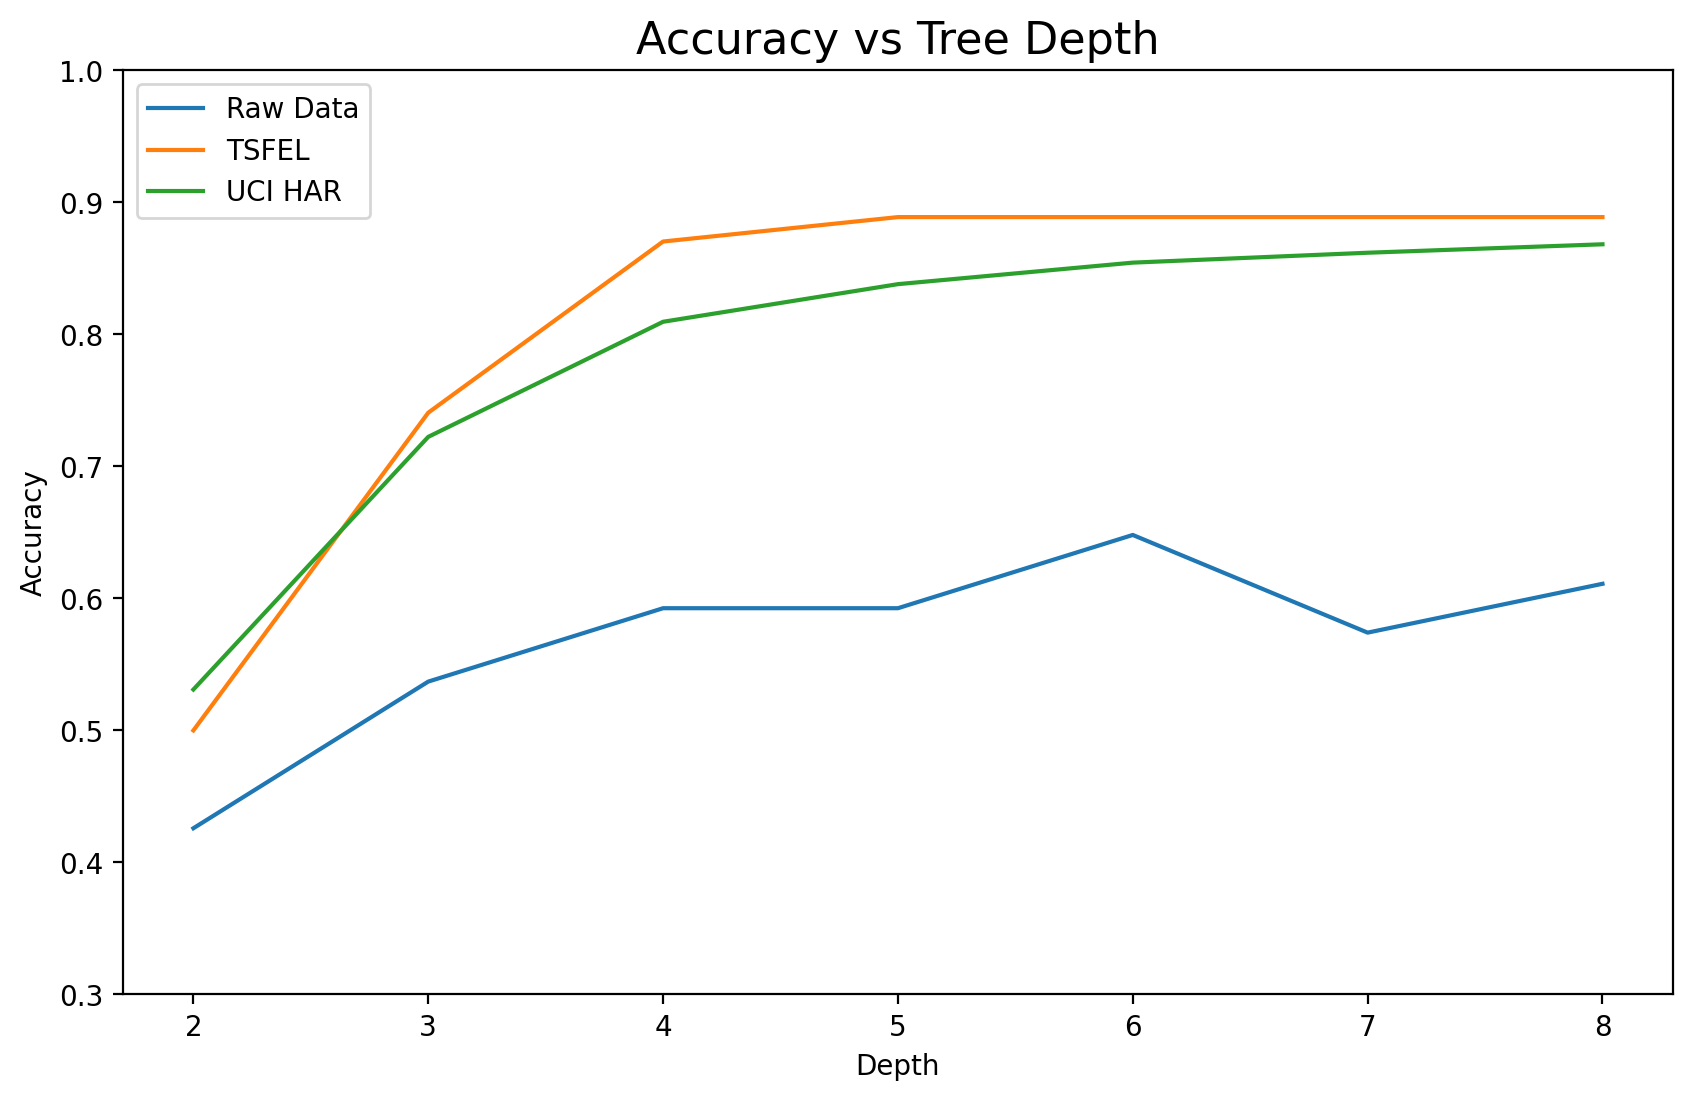

In [19]:
depth_list = range(2, 9)

plt.figure(figsize=(10, 6))
plt.plot(depth_list, accuracies_raw, label='Raw Data')
plt.plot(depth_list, accuracies_tsfel, label='TSFEL')
plt.plot(depth_list, accuracies_UCI, label='UCI HAR')
plt.title('Accuracy vs Tree Depth', fontsize=16)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.ylim(0.3,1)
plt.legend()
plt.show()

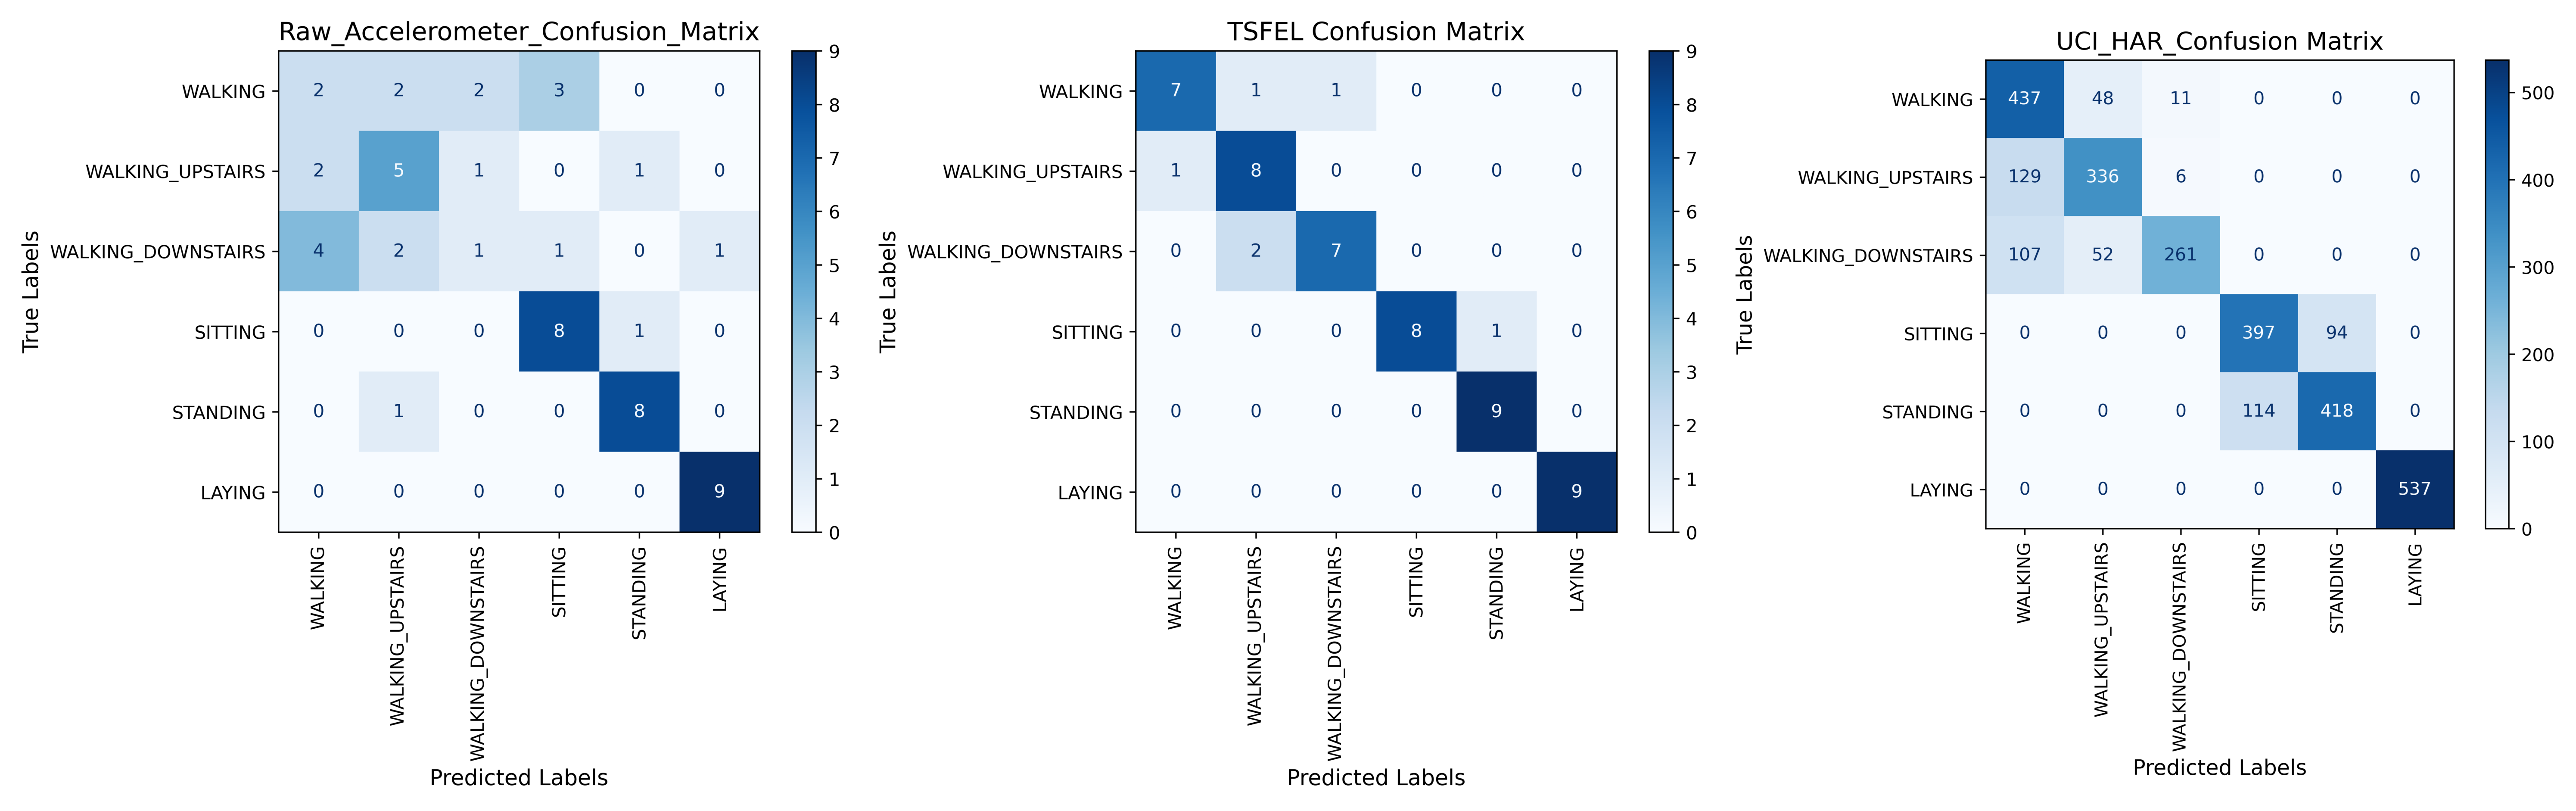

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(30, 30))
axes = axes.flatten()

plt.subplot(1, 3, 1)
img1 = plt.imread(r'C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Task-2 Decision Trees for HAR\Saved_Images\Raw_Accelerometer_Confusion_Matrix.png')
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 3, 2)
img2 = plt.imread(r'C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Task-2 Decision Trees for HAR\Saved_Images\TSFEL_Confusion_Matrix.png')
plt.imshow(img2)
plt.axis('off')

plt.subplot(1, 3, 3)
img3 = plt.imread(r'C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Task-2 Decision Trees for HAR\Saved_Images\UCI_HAR_Confusion Matrix.png')
plt.imshow(img3)
plt.axis('off')

plt.tight_layout()
plt.show()

1. Model trained using Raw Accelerometer Data:

The model trained using raw accelerometer data performs poorly compared to the other 2 models. From the confusion matrix, we can observe that it struggles to distinguish between dynamic activities like WALKING, WALKING_UPSTAIRS and WALKING_DOWNSTAIRS. It also faces some confusion between SITTING and STANDING. This is because the raw accelerometer data has only 3 features, which is causing the model to underfit. This can be solved by including more features (for example, by using the TSFEL featurization).

2. Model trained using TSFEL Features:

The model trained features extracted through TSFEL, performs the best among the three, accuracy-wise. It is able to classify all the static activities with good accuracy and also classifies dynamic activities with minimal confusion. This is because the TSFEL features, which are derived through automated processes, provide a set of distinctive features that enable accurate differentiation between various activities.

3. Model trained on UCI Dataset:

The model trained using the features provided by the UCI HAR dataset, performs almost as good as the TSFEL model. It faces confusion while classifying the dynamic activities similar to the TSFEL model, but it also faces some confusion while classifying between SITTING and STANDING activties. But its performance is still impressive as it is able to perform as good as the TSFEL model with minimal accuracy drop and whilst using half the features compared to TSFEL.